# Histogram Equalization, Local Histogram Equalization and Local Enhancement

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## get inputs

In [ ]:
# read input
image = Image.open('data/Beans.png').convert('LA')

In [ ]:
# convert inputs
image_arr = np.asarray(image)
image_arr = image_arr[:,:,0]

In [ ]:
# show input
plt.imshow(image_arr, cmap='gray', vmin=0, vmax=255)
plt.show()

## Histogram Equalization

In [ ]:
equ = cv2.equalizeHist(image_arr)

In [ ]:
plt.imshow(equ, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
cv2.imwrite('result/HistEqRes.png',equ)

## Local Histogram Equalization

In [45]:
def local_histogram_equalization(image_arr, kernel):
    x_len = len(image_arr)
    y_len = len(image_arr[0])
    result = np.zeros(image_arr.shape)
    for i in range(0, x_len, kernel[0]):
        for j in range(0, y_len, kernel[1]):
            x_end = int(min(i + kernel[0], x_len))
            y_end = int(min(j + kernel[1], y_len))
            image_part = image_arr[i: x_end, j: y_end]
            result[i: x_end, j: y_end] = cv2.equalizeHist(image_part)
    return result

In [46]:
local_equ = local_histogram_equalization(image_arr, (3,3))

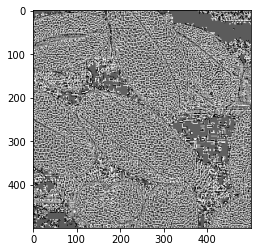

In [47]:
plt.imshow(local_equ, cmap='gray', vmin=0, vmax=255)
plt.show()

In [49]:
cv2.imwrite('result/LocalHistEqRes.png',local_equ)

True